# Project: Investigate a Dataset - [No show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Dataset can be found here: <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.">No Show Appointment</a>


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


#### Question to keep in mind for Analysis:

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

##### Import Dependencies

In [39]:
%matplotlib inline
import csv 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [40]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [41]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

print(df.shape)
print(df.head())

(110527, 14)
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0  

### Data wrangling 

##### Check properties

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that we have no missing values from the data. We have 5 object columns, 8 integer columns and a float column.

In [43]:
df.duplicated().sum()

0

We have no duplicated values across the dataset

In [44]:

print(df.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

###### NB: We can see minimum age recorded is a negative number which is not possible, this could be an error in data collection. We can also see the max age recorded is 115 which isn't too out of range but most likely higher than the life expectancy range. The person could be an exception.

Q. We might want to know the length of time data collection spanned for.


In [45]:
df.ScheduledDay.min(), df.ScheduledDay.max()

('2015-11-10T07:13:56Z', '2016-06-08T20:07:23Z')

from November 10, 2015 to June 06, 2016 which is about 5 months worth of data collection.

In [46]:
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

Appointment days about a month of operation

Even though we didn't have duplicated values in the dataset, we could check for unique values.
Q. Are all records of the patients unique based on the patients id?

In [47]:
df.PatientId.nunique()

62299

We have just 62299 unique patients record, which is about 56% of the patients of the dataset. # 110527 > 62299

Some patients have multiple records

In [48]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


### Data Cleaning


In the Documentation, Handcap comes with 2 levels - True/False so '1/0' ;However, the unique values in Handcap consists of 0/1/2/3/4 We need to investigate what they are.

In [49]:
df.Handcap = df.Handcap.replace([1,2,3,4], 1)

In [50]:
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

Remember the age with the negative value

In [51]:
print(df[df.Age < 0 ])

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


We remove one of the rows with a negative age value and PatientId - drop the desired value using the index directly.

In [52]:
df = df.drop(99832)
df = df.reset_index(drop=True)
df.iloc[99832]

PatientId                  2.89827e+13
AppointmentID                  5774075
Gender                               M
ScheduledDay      2016-06-06T07:50:27Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                  1
Neighbourhood           FORTE SÃO JOÃO
Scholarship                          0
Hipertension                         0
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

In [53]:
# getting dummies of categorical variables. 
df[['showup', 'noshowup']] = pd.get_dummies(df['No-show'])
df.drop(['noshowup', 'No-show'], axis=1, inplace=True)
df[['female', 'male']] = pd.get_dummies(df['Gender'])
df.drop('female', axis=1, inplace=True)
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received  showup  male  
0         0           0        0             0       1     0  
1         0           0   

<a id='eda'></a>
## Exploratory Data Analysis


### Compare statistics Visually

Text(0.5,1,'Gender Records')

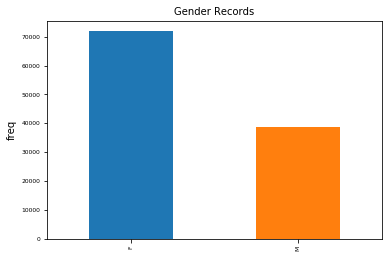

In [54]:
df.Gender.value_counts().plot(kind='bar')
plt.ylabel('freq')
plt.title('Gender Records')

We can see that there are significant number of female records as compared to the male records

Text(0.5,1,'Appointment Records')

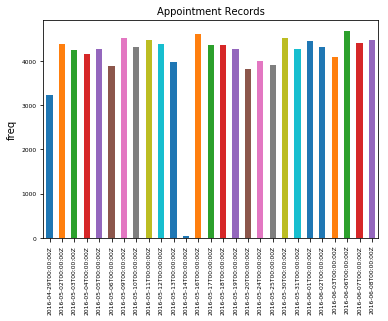

In [55]:

# Appointment time
df.AppointmentDay.value_counts().sort_index().plot(kind='bar')
plt.ylabel('freq')
plt.title('Appointment Records')

Around the appointment period, we can see that the days experience roughly a good amount of appointments. However, on May 14th, 2015, there was no recorded appointment.

Text(0.5,1,'MeanAge by Gender')

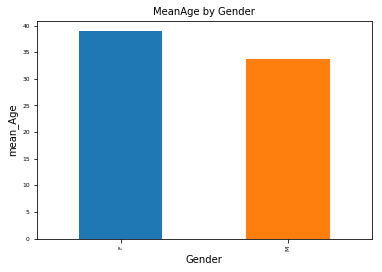

In [56]:
# Age
gen_means = df.groupby('Gender')['Age'].mean()
gen_means.plot(kind='bar')
plt.ylabel('mean_Age')
plt.title('MeanAge by Gender')

The mean age of patients based on gender is around the same. Greater than 30 and less than 40.

Text(0.5,1,'No.of appointment by Age')

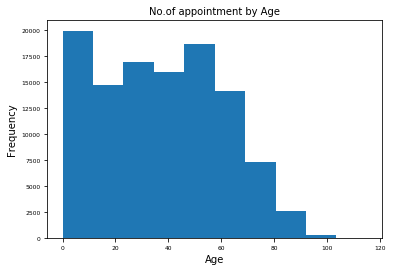

In [57]:
df.Age.plot(kind='hist')
plt.xlabel('Age')
plt.title('No.of appointment by Age')

We could see the distribution of the age slighly skewed to the right

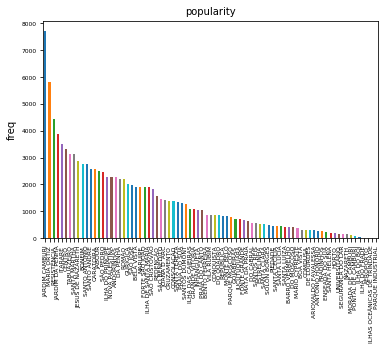

In [58]:
df['Neighbourhood'].value_counts().plot(kind = 'bar')
plt.ylabel('freq')
plt.title('popularity')

plt.rc('font', size=6)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
plt.rc('figure', titlesize=12) 

We can only as much decipher that some neighbourhood as more popular in patients that the others

In [64]:
# proportions
df['showup'].mean(), df['Scholarship'].mean(), df['Hipertension'].mean(), df['Diabetes'].mean(), df['Alcoholism'].mean(), df['Handcap'].mean(), df['SMS_received'].mean()

(0.79806561352080052,
 0.098266471237536873,
 0.19724770642201836,
 0.071865443425076447,
 0.030400086857391023,
 0.020275772216492047,
 0.32102853627200839)

We can conclude that there is 79.8& show up rate, 9% of patients have Scholarship, 20% suffer from Hypertension, 7% come for diabetes, 3% have alcoholism, 2% have handcap, and 32% received SMS.

### Research Question 2  (Relationship of features with target variable)

In [68]:
df.groupby('Scholarship').mean()['showup']

Scholarship
0    0.801926
1    0.762637
Name: showup, dtype: float64

In [69]:
df['showup'].corr(df.Scholarship)

-0.029133576642242962

We can see that there is a negative correlation between show up rate and having a scholarship.
People who do not have scholarship have a average show up rate of 80% while people with scholarship have a average show up rate of 76%.

In [70]:
df.groupby('Hipertension').mean()['showup']

Hipertension
0    0.790961
1    0.826980
Name: showup, dtype: float64

We can see that there is a positive correlation between show up rate and having hypertension. People who do not have hypertension have a average show up rate of 79% while people with hypertension have a average show up rate of 83%.

In [71]:
df['showup'].corr(df.Hipertension)

0.035703513860921958

In [74]:
print(df.groupby('Diabetes').mean()['showup'])

print(df['showup'].corr(df.Diabetes))

Diabetes
0    0.796370
1    0.819967
Name: showup, dtype: float64
0.015181232917


We can see that there is a positive correlation between show up rate and having Diabetes. People who do not have Diabetes have a average show up rate of 80% while people with Diabetes have a average show up rate of 82%.

In [75]:
print(df.groupby('Alcoholism').mean()['showup'])

print(df['showup'].corr(df.Alcoholism))

Alcoholism
0    0.798052
1    0.798512
Name: showup, dtype: float64
0.000196849833956


We can see that there is a positive correlation between show up rate and Alcoholism however small which could mean more or less no significant relationship. People who are Alcoholic and people who are not Alcoholic both have an average show up rate of 80%.

In [76]:
print(df.groupby('Handcap').mean()['showup'])

print(df['showup'].corr(df.Handcap))

Handcap
0    0.797645
1    0.818385
Name: showup, dtype: float64
0.00728140927594


We can see that there is a positive correlation between show up rate and Handcap however small which could mean more or less no significant relationship. People who have Handcap have an average show up rate of 82% and people who do not have Handcap have an average show up rate of 80%.

In [77]:
print(df.groupby('SMS_received').mean()['showup'])

print(df['showup'].corr(df.SMS_received))

SMS_received
0    0.832965
1    0.724255
Name: showup, dtype: float64
-0.126427943299


How about Gender?

In [79]:
print(df.groupby(['showup', 'Gender']).mean())

                  PatientId  AppointmentID        Age  Scholarship  \
showup Gender                                                        
0      F       1.452126e+14   5.651340e+06  36.162190     0.144306   
       M       1.496610e+14   5.653994e+06  30.833010     0.061100   
1      F       1.462122e+14   5.680199e+06  39.591126     0.117862   
       M       1.503964e+14   5.682868e+06  34.461372     0.049609   

               Hipertension  Diabetes  Alcoholism   Handcap  SMS_received  \
showup Gender                                                               
0      F           0.182061  0.069686    0.021105  0.016651      0.460463   
       M           0.144337  0.053463    0.047767  0.021230      0.396634   
1      F           0.221539  0.080164    0.015984  0.018290      0.305389   
       M           0.172696  0.062141    0.057102  0.025418      0.265358   

               male  
showup Gender        
0      F          0  
       M          1  
1      F          0  
      

In [80]:
# Gender vs showup 
df.groupby('Gender').mean()['showup']

Gender
F    0.796851
M    0.800321
Name: showup, dtype: float64

In [81]:
df.showup.corr(df.male)

0.0041219877427054593

There is a positive correlation however small.  Both female and male have an average of 80% showup rate.

Even though the rate is close, we should also remember that there is a significant difference in the amount of female and male in this dataset.

Text(0.5,1,'Appointments by Gender+Age')

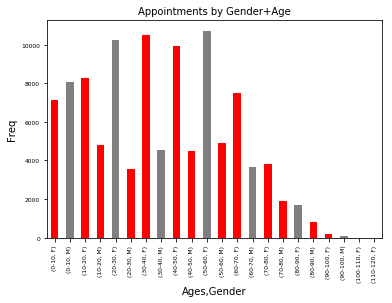

In [83]:
df['Ages'] = pd.cut(df['Age'], 
                     bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 
                     labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120'])
df.groupby(['Ages', 'Gender']).PatientId.count().plot(kind='bar', color=['red', 'grey'])
plt.ylabel('Freq')
plt.title('Appointments by Gender+Age')

Text(0.5,1,'show-up rate by Gender+Age')

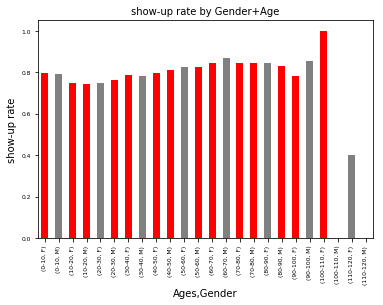

In [84]:
df.groupby(['Ages', 'Gender']).mean()['showup'].plot(kind='bar', color=['red', 'grey'])
plt.ylabel('show-up rate')
plt.title('show-up rate by Gender+Age')

Females in general  more appointments(from the age of 10 to 80), but there is no significant difference in 'show-up rate' between genders.

Other Factors

Text(0.5,1,'show-up rate by Gender&Scholarship')

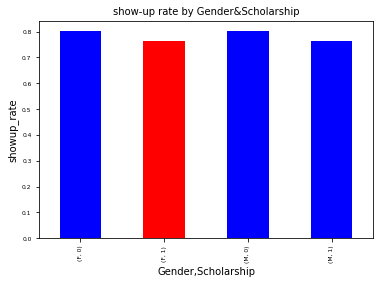

In [88]:
df.groupby(['Gender', 'Scholarship']).mean()['showup'].plot(
    kind='bar', color=['blue','red'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender&Scholarship')

People of both gender without scholarship have a higher showup rate

Text(0.5,1,'show-up rate by Gender&Hipertension')

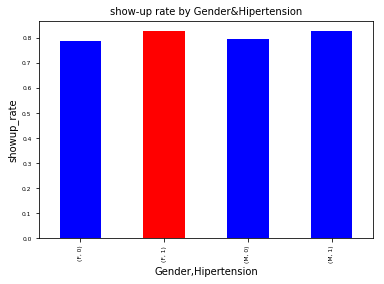

In [90]:

df.groupby(['Gender', 'Hipertension']).mean()['showup'].plot(
    kind='bar', color=['blue','red'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender&Hipertension')

People of both gender with hypertension have a higher showup rate

Text(0.5,1,'show-up rate by Gender&Diabetes')

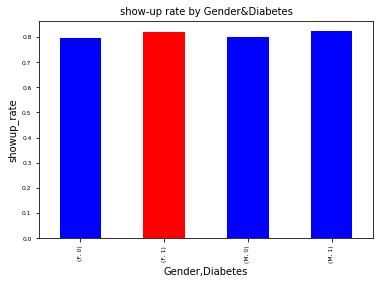

In [91]:

df.groupby(['Gender', 'Diabetes']).mean()['showup'].plot(
    kind='bar', color=['blue','red'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender&Diabetes')

People of both gender with Diabetes have a higher showup rate

Text(0.5,1,'show-up rate by Gender%Alcoholism')

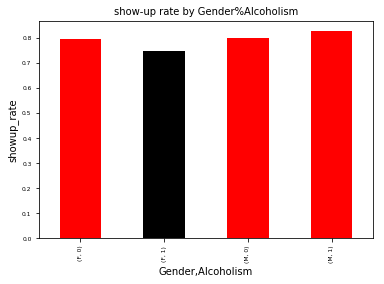

In [92]:
df.groupby(['Gender', 'Alcoholism']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender%Alcoholism')

Males that are alcoholic have higher show up rate

Text(0.5,1,'show-up rate by Gender&SMS')

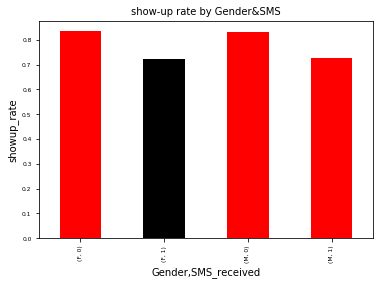

In [95]:
df.groupby(['Gender', 'SMS_received']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Gender&SMS')

Those who did not receive SMS of both genders have higher show up rate

Across Ages

Text(0.5,1,'show-up rate by Ages&Scholarship')

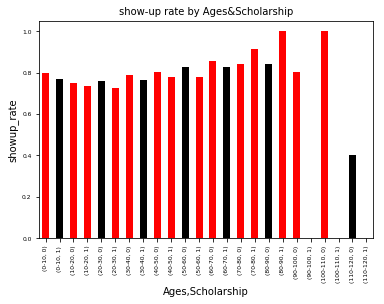

In [96]:
df.groupby(['Ages', 'Scholarship']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Ages&Scholarship')

Text(0.5,1,'show-up rate by Ages&Hipertension')

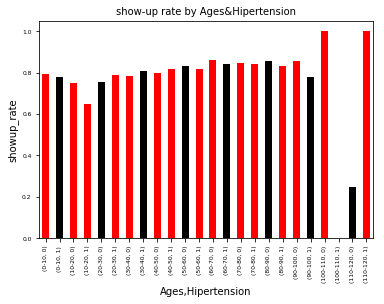

In [97]:
df.groupby(['Ages', 'Hipertension']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Ages&Hipertension')

In teenagers, less than 70% of those with hypertension tend to show up, which is less than average of all across the ages.

Text(0.5,1,'show-up rate by Ages&Diabetes')

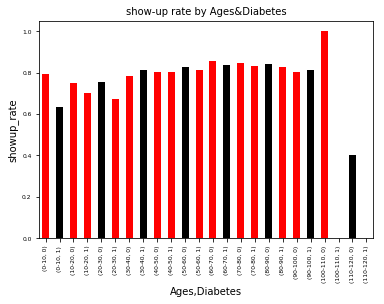

In [98]:
df.groupby(['Ages', 'Diabetes']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Ages&Diabetes')

Youngers with diabetes have a lower show up rate.

Text(0.5,1,'show-up rate by Ages&Alcoholism')

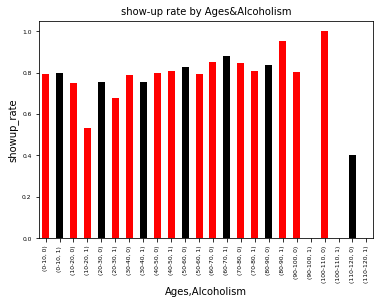

In [99]:
df.groupby(['Ages', 'Alcoholism']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Ages&Alcoholism')

Less than 60% of teenagers who are alcoholic show up 

Text(0.5,1,'show-up rate by Ages&SMS')

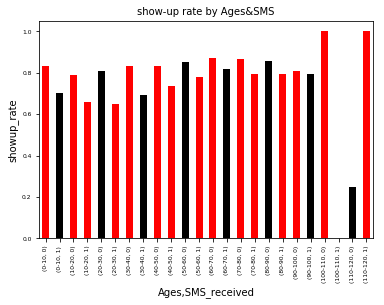

In [100]:
df.groupby(['Ages', 'SMS_received']).mean()['showup'].plot(
    kind='bar', color=['red','black'])
plt.ylabel('showup_rate')
plt.title('show-up rate by Ages&SMS')

Majority of the people that show up in all age gaps are those that didnt receive SMS interestingly.

In Conclusion, 
During exploration, there was no particular feature that was certainly on which the show up rate depended. We however tried to find singular relationship between particular fetures and show up rate as well as combining between two features at a time and their correlation with show up rate. We discovered a set of possible relationships using Age, Gender etc.

Possible Limitations could include the geography of the hospitals and residences of the patients and how there could be possible commuting problems that could affect show up rate.

Or the general reasons why females are more likely to be the ones that seem to make an appointment. Is it due to the fact that they are more in need or that maybe the men have to go to work and hence miss possible appointment due to other commitments.

In [101]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0